# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | caleta de carquin
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | powell river
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | lodwar
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | constantia
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | bewdley
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | kone
Processing Record 20 of Set 1 | carutapera
Processing Record 21 of Set 1 | nuuk
Processing Record 22 of Set 1 | rongelap
Proc

Processing Record 41 of Set 4 | laguna
Processing Record 42 of Set 4 | kupino
Processing Record 43 of Set 4 | donggang
Processing Record 44 of Set 4 | verkhnevilyuysk
Processing Record 45 of Set 4 | arawa
Processing Record 46 of Set 4 | slatina
Processing Record 47 of Set 4 | daru
Processing Record 48 of Set 4 | pimentel
Processing Record 49 of Set 4 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 0 of Set 5 | ust-nera
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | olinda
Processing Record 3 of Set 5 | al jawf
Processing Record 4 of Set 5 | fort saskatchewan
Processing Record 5 of Set 5 | whakatane
Processing Record 6 of Set 5 | kiunga
Processing Record 7 of Set 5 | qaqortoq
Processing Record 8 of Set 5 | nizhneudinsk
Processing Record 9 of Set 5 | isafjordur
Processing Record 10 of Set 5 | dunedin
Processing Record 11 of Set 5 | komotini
Processing Record 12 of Set 5 | deulgaon raja
Processing Record 13 of Set 5 | debark'
Processing Record 14 of Set 

Processing Record 34 of Set 8 | queenstown
Processing Record 35 of Set 8 | erenhot
Processing Record 36 of Set 8 | bel ombre
Processing Record 37 of Set 8 | bonab
Processing Record 38 of Set 8 | gremda
Processing Record 39 of Set 8 | khasab
Processing Record 40 of Set 8 | sarupathar
Processing Record 41 of Set 8 | bamusso
Processing Record 42 of Set 8 | berezovyy
Processing Record 43 of Set 8 | pembroke
Processing Record 44 of Set 8 | zapolyarnyy
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | eilat
Processing Record 47 of Set 8 | imbituba
Processing Record 48 of Set 8 | jagatsinghapur
Processing Record 49 of Set 8 | conception bay south
Processing Record 0 of Set 9 | ciudad de huajuapan de leon
Processing Record 1 of Set 9 | miguel aleman (la doce)
City not found. Skipping...
Processing Record 2 of Set 9 | eyl
Processing Record 3 of Set 9 | klyuchi
Processing Record 4 of Set 9 | sabang
Processing Record 5 of Set 9 | yemetsk
Processing Record 6 of Set 9 | isle of 

Processing Record 19 of Set 12 | luanda
Processing Record 20 of Set 12 | young
Processing Record 21 of Set 12 | laojunmiao
Processing Record 22 of Set 12 | axim
Processing Record 23 of Set 12 | kilindoni
Processing Record 24 of Set 12 | island harbour
Processing Record 25 of Set 12 | binji
Processing Record 26 of Set 12 | flin flon
Processing Record 27 of Set 12 | nguigmi
Processing Record 28 of Set 12 | kharabali
Processing Record 29 of Set 12 | vilyuysk
Processing Record 30 of Set 12 | harper
Processing Record 31 of Set 12 | polyarnyy
Processing Record 32 of Set 12 | luwuk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,14.52,81,52,6.46,ZA,1692388425
1,caleta de carquin,-11.0925,-77.6267,20.71,72,12,5.93,PE,1692388763
2,karratha,-20.7377,116.8463,19.66,29,0,7.56,AU,1692388601
3,powell river,49.8496,-124.5361,20.74,48,0,6.69,CA,1692388765
4,pisco,-13.7000,-76.2167,22.03,68,75,9.26,PE,1692388499


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/marmar/Documents/bootcamp/dataanalytics/Module 6/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("/Users/marmar/Documents/bootcamp/dataanalytics/Module 6/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,14.52,81,52,6.46,ZA,1692388425
1,caleta de carquin,-11.0925,-77.6267,20.71,72,12,5.93,PE,1692388763
2,karratha,-20.7377,116.8463,19.66,29,0,7.56,AU,1692388601
3,powell river,49.8496,-124.5361,20.74,48,0,6.69,CA,1692388765
4,pisco,-13.7000,-76.2167,22.03,68,75,9.26,PE,1692388499


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

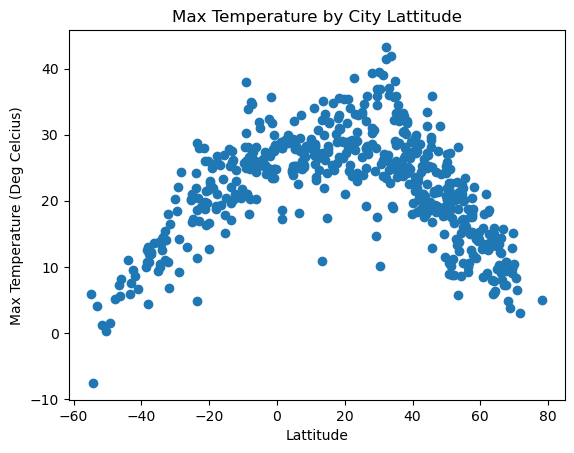

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Max Temperature (Deg Celcius)')
plt.title("Max Temperature by City Lattitude")

# Save the figure
plt.savefig("/Users/marmar/Documents/bootcamp/dataanalytics/Module 6/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

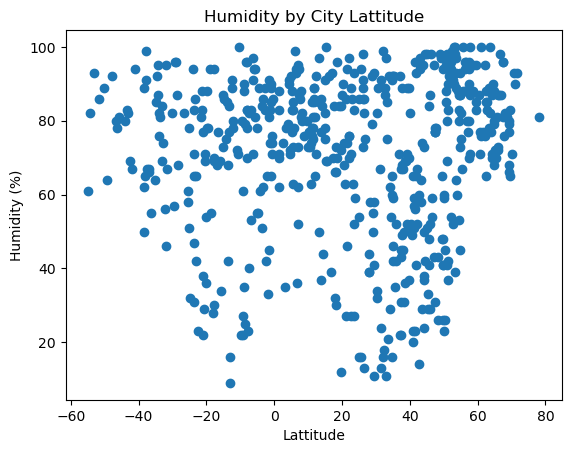

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

# Save the figure
plt.savefig("/Users/marmar/Documents/bootcamp/dataanalytics/Module 6/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

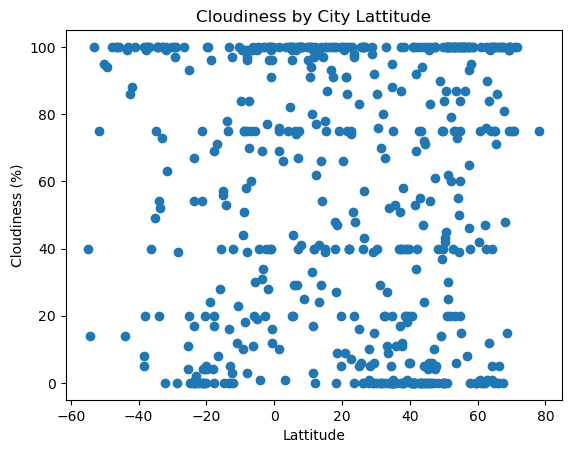

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")


# Save the figure
plt.savefig("/Users/marmar/Documents/bootcamp/dataanalytics/Module 6/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

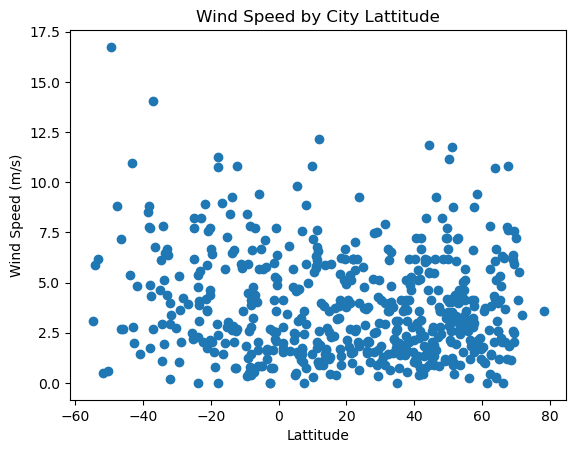

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("Wind Speed by City Lattitude")
# Save the figure
plt.savefig("/Users/marmar/Documents/bootcamp/dataanalytics/Module 6/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linreg(x,y,a,b):
    slope, intercept, r, p, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"red")
    plt.annotate(line_eq, xy=(a, b), xycoords='axes fraction',fontsize=15,color="red")
    print(f"The r is: {r}")
    print(f"The r-squared is: {r**2}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df=city_data_df.loc[(city_data_df['Lat'] >= 0), :]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,powell river,49.8496,-124.5361,20.74,48,0,6.69,CA,1692388765
6,bethel,41.3712,-73.4140,27.60,59,0,3.60,US,1692388500
8,lodwar,3.1191,35.5973,29.99,35,1,6.83,KE,1692388766
9,anadyr,64.7500,177.4833,14.28,88,75,4.00,RU,1692388552
10,constantia,44.1833,28.6500,22.61,73,5,4.62,RO,1692388471


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df=city_data_df.loc[(city_data_df['Lat'] < 0), :]
# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,14.52,81,52,6.46,ZA,1692388425
1,caleta de carquin,-11.0925,-77.6267,20.71,72,12,5.93,PE,1692388763
2,karratha,-20.7377,116.8463,19.66,29,0,7.56,AU,1692388601
4,pisco,-13.7000,-76.2167,22.03,68,75,9.26,PE,1692388499
5,adamstown,-25.0660,-130.1015,16.84,51,93,7.74,PN,1692388467


###  Temperature vs. Latitude Linear Regression Plot

The r is: -0.6802967417218508
The r-squared is: 0.4628036567973666


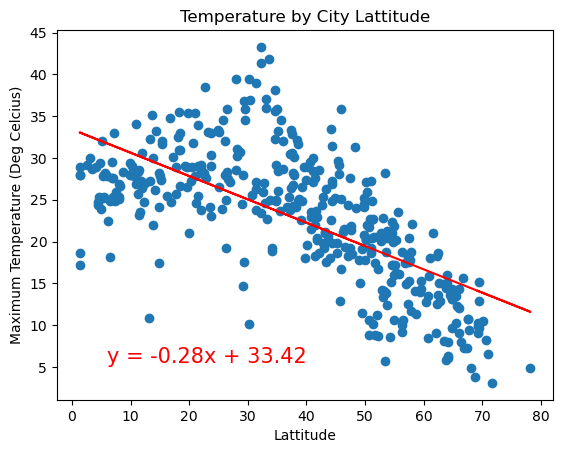

In [19]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemisphere_df['Lat'],northern_hemisphere_df['Max Temp'])
plt.xlabel("Lattitude")
plt.ylabel('Maximum Temperature (Deg Celcius)')
plt.title("Temperature by City Lattitude")

linreg(northern_hemisphere_df['Lat'],northern_hemisphere_df['Max Temp'],.1,.1)

The r is: 0.8613649018562762
The r-squared is: 0.7419494941498724


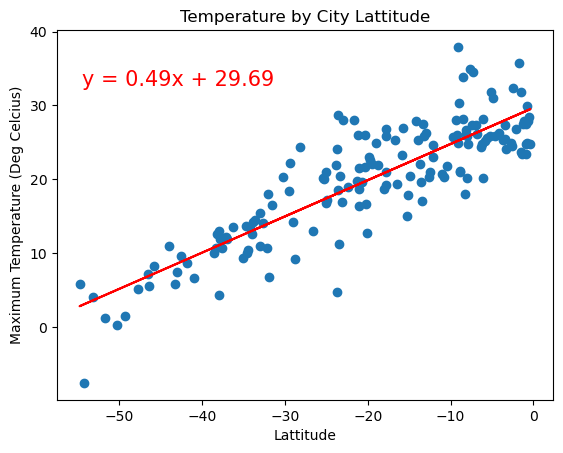

In [20]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemisphere_df['Lat'],southern_hemisphere_df['Max Temp'])
plt.xlabel("Lattitude")
plt.ylabel('Maximum Temperature (Deg Celcius)')
plt.title("Temperature by City Lattitude")

linreg(southern_hemisphere_df['Lat'],southern_hemisphere_df['Max Temp'],.05,.85)

**Discussion about the linear relationship:** based on the regression lines, latitude and temperature have significant correlation in both Northern and Southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r is: 0.0839552205363047
The r-squared is: 0.007048479055299559


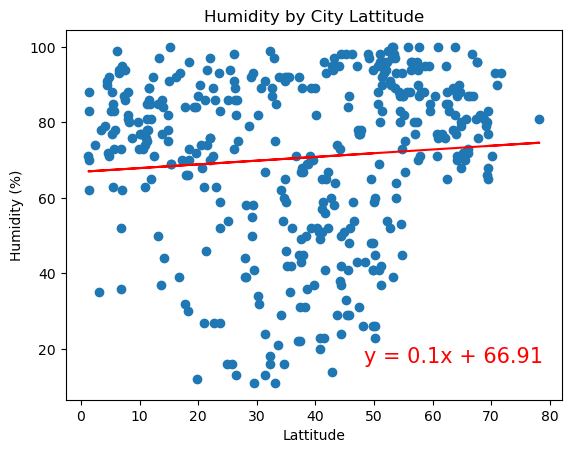

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemisphere_df['Lat'],northern_hemisphere_df['Humidity'])
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

linreg(northern_hemisphere_df['Lat'],northern_hemisphere_df['Humidity'],.6,.1)

The r is: -0.11078320439915024
The r-squared is: 0.0122729183769439


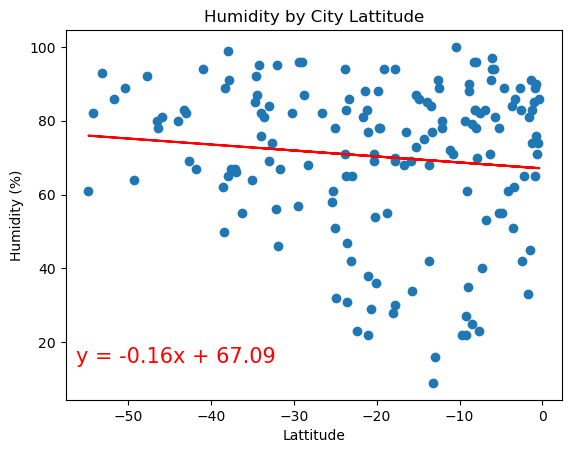

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemisphere_df['Lat'],southern_hemisphere_df['Humidity'])
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

linreg(southern_hemisphere_df['Lat'],southern_hemisphere_df['Humidity'],.02,.1)

**Discussion about the linear relationship:** Based on the regression analysis, it appears that there is a limited correlation between humidity and latitude in the northern hemisphere. However, in the southern hemisphere, there is a noticeable positive correlation between these two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r is: -0.03972225682770337
The r-squared is: 0.0015778576874860269


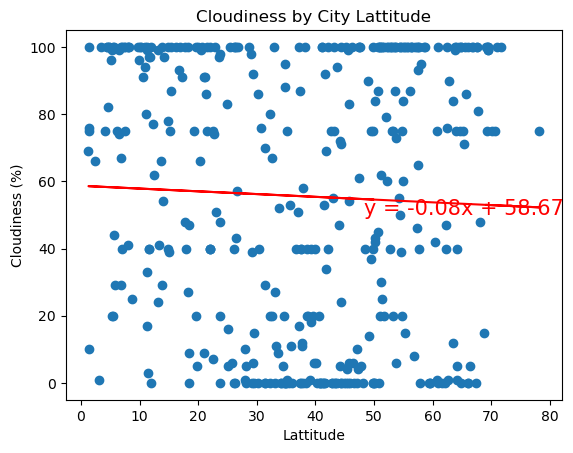

In [24]:
# Northern Hemisphere
plt.scatter(northern_hemisphere_df['Lat'],northern_hemisphere_df['Cloudiness'])
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

linreg(northern_hemisphere_df['Lat'],northern_hemisphere_df['Cloudiness'],.6,.5)

The r is: -0.10959401242425683
The r-squared is: 0.01201084755924816


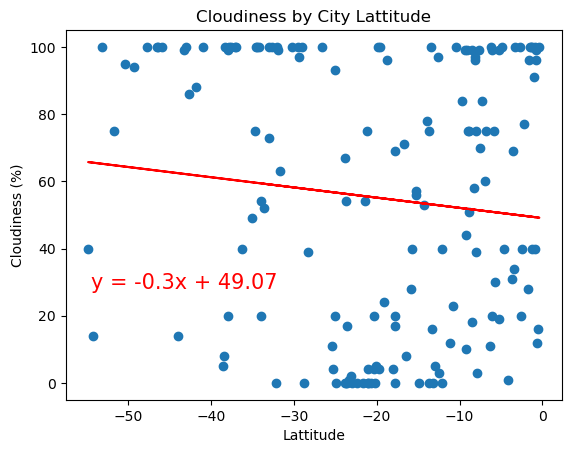

In [25]:
# Southern Hemisphere
plt.scatter(southern_hemisphere_df['Lat'],southern_hemisphere_df['Cloudiness'])
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

linreg(southern_hemisphere_df['Lat'],southern_hemisphere_df['Cloudiness'],.05,.3)

**Discussion about the linear relationship:** In the northern hemisphere, cloudiness and latitude show no discernible correlation. Conversely, in the southern hemisphere, a clear and meaningful positive correlation between these two variables is evident.

### Wind Speed vs. Latitude Linear Regression Plot

The r is: 0.05313143720260197
The r-squared is: 0.0028229496192140363


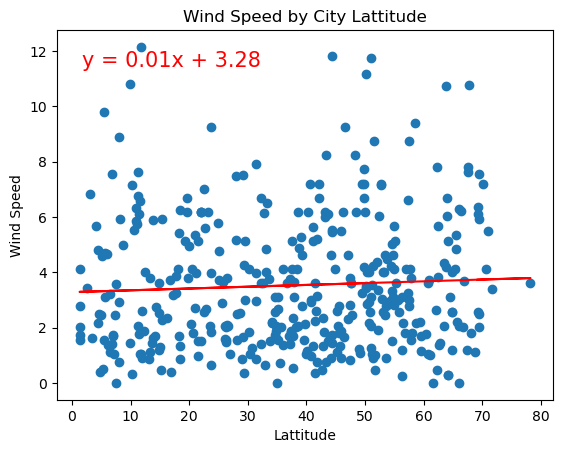

In [26]:
# Northern Hemisphere
plt.scatter(northern_hemisphere_df['Lat'],northern_hemisphere_df['Wind Speed'])
plt.xlabel("Lattitude")
plt.ylabel('Wind Speed')
plt.title("Wind Speed by City Lattitude")

linreg(northern_hemisphere_df['Lat'],northern_hemisphere_df['Wind Speed'],.05,.9)

The r is: -0.2033898980126105
The r-squared is: 0.0413674506135801


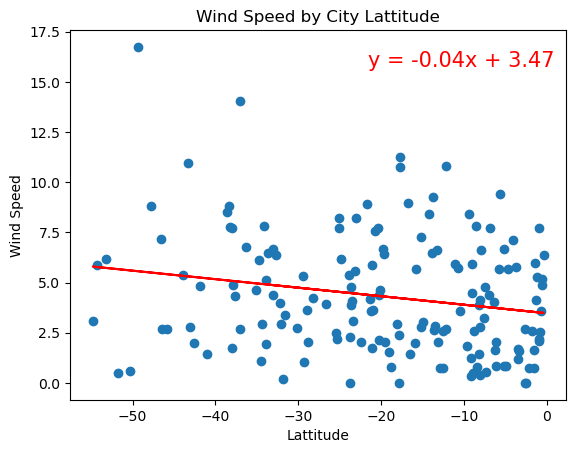

In [27]:
# Southern Hemisphere
plt.scatter(southern_hemisphere_df['Lat'],southern_hemisphere_df['Wind Speed'])
plt.xlabel("Lattitude")
plt.ylabel('Wind Speed')
plt.title("Wind Speed by City Lattitude")

linreg(southern_hemisphere_df['Lat'],southern_hemisphere_df['Wind Speed'],.6,.9)

**Discussion about the linear relationship:** While the northern hemisphere exhibits a minimal correlation between wind speed and latitude, the southern hemisphere displays a substantial and notable correlation between these two variables.